In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

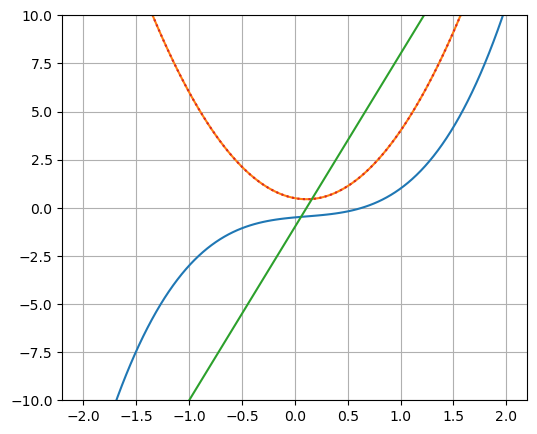

In [43]:
fig, ax = plt.subplots(figsize=(6,5))
ax.grid()
ax.set_xlim([-2.2, 2.2])
ax.set_ylim([-10.0,10.0])

def pol(xs, a=1.5,b=-0.5,c=0.5,d=-0.5):
    return a*xs**3 + b*xs**2+c*xs+d

def polp(xs, a=1.5,b=-0.5,c=0.5,d=-0.5):
    return 3*a*xs**2 + 2*b*xs+c

xs = torch.linspace(-2.0,2.0, 100, requires_grad=True)
ys = pol(xs=xs)
ysp = torch.autograd.grad(ys,xs,torch.ones_like(ys), create_graph=True)[0] #For higher derivatives we need to "retain the graph" otherwise we loose the gradient function.
yspp = torch.autograd.grad(ysp,xs,torch.ones_like(ys))[0] #Could have done the same caluclation using .backward(), but this method is only reserved for scalar outputs? So would need a loop over all ys
with torch.no_grad(): #Have to detach gradient in order to call .numpy() for plotting. Could also have used .detach() and as xs_det = xs.detach()
    ax.plot(xs, ys)
    ax.plot(xs, ysp)
    ax.plot(xs, yspp)
    ax.plot(xs, polp(xs), ':')